Cost after iteration 0: 0.6677595973014832
Cost after iteration 100: 0.5851836204528809
Cost after iteration 200: 0.4667340815067291
Cost after iteration 300: 0.3750947415828705
Cost after iteration 400: 0.33063751459121704
Cost after iteration 500: 0.3025476038455963
Cost after iteration 600: 0.27923843264579773
Cost after iteration 700: 0.25947096943855286
Cost after iteration 800: 0.24242764711380005
Cost after iteration 900: 0.2275397628545761
Cost after iteration 1000: 0.21439604461193085
Cost after iteration 1100: 0.20268972218036652
Cost after iteration 1200: 0.19218608736991882
Cost after iteration 1300: 0.18270160257816315
Cost after iteration 1400: 0.1740902066230774
Cost after iteration 1500: 0.16623380780220032
Cost after iteration 1600: 0.1590356081724167
Cost after iteration 1700: 0.1524152010679245
Cost after iteration 1800: 0.14630535244941711
Cost after iteration 1900: 0.14064908027648926
Train accuracy: 99.04306030273438%
Test accuracy: 70.0%


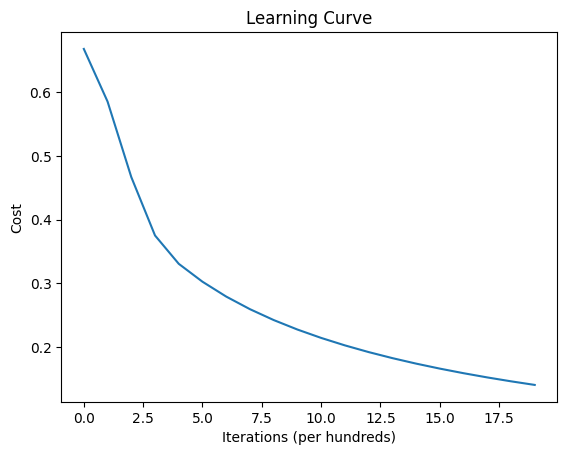

In [25]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from lr_utils import load_dataset  # Funkcja ładująca dane

# Ładowanie danych (cat/non-cat)
train_set_x_orig, train_set_y, test_set_x_orig, test_set_y, classes = load_dataset()
num_px = train_set_x_orig.shape[1]

# Przygotowanie danych: flatten, standaryzacja i transpozycja (kierunek: [m, n_features])
train_set_x = (train_set_x_orig.reshape(train_set_x_orig.shape[0], -1) / 255.).astype(np.float32)
test_set_x  = (test_set_x_orig.reshape(test_set_x_orig.shape[0], -1) / 255.).astype(np.float32)
train_set_y = train_set_y.T.astype(np.float32)  # kształt [m, 1]
test_set_y  = test_set_y.T.astype(np.float32)

# Konwersja do tensorów PyTorch
X_train = torch.tensor(train_set_x)
Y_train = torch.tensor(train_set_y)
X_test  = torch.tensor(test_set_x)
Y_test  = torch.tensor(test_set_y)

# Model: pojedyncza warstwa lini
input_dim = X_train.shape[1]
model = nn.Sequential(
    nn.Linear(input_dim, 1),
    nn.Sigmoid()
)

criterion = nn.BCELoss()
optimizer = optim.SGD(model.parameters(), lr=0.005)

num_iterations = 2000
costs = []

# Pętla treningowa
for i in range(num_iterations):
    optimizer.zero_grad()
    outputs = model(X_train)
    loss = criterion(outputs, Y_train)
    loss.backward()
    optimizer.step()

    if i % 100 == 0:
        costs.append(loss.item())
        print(f"Cost after iteration {i}: {loss.item()}")

# Ewaluacja modelu
with torch.no_grad():
    train_pred = (model(X_train) > 0.5).float()
    test_pred = (model(X_test) > 0.5).float()
    train_accuracy = 100 - torch.mean(torch.abs(train_pred - Y_train)) * 100
    test_accuracy = 100 - torch.mean(torch.abs(test_pred - Y_test)) * 100
    print(f"Train accuracy: {train_accuracy.item()}%")
    print(f"Test accuracy: {test_accuracy.item()}%")

# Wizualizacja przebiegu kosztu
plt.plot(costs)
plt.xlabel('Iterations (per hundreds)')
plt.ylabel('Cost')
plt.title('Learning Curve')
plt.show()


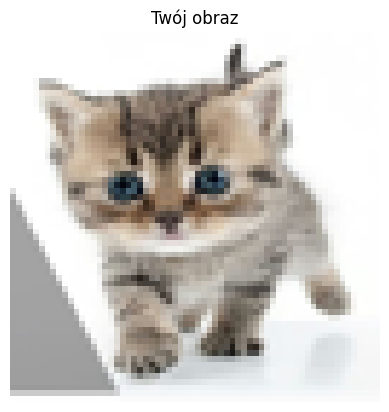

Predicted label: 1, it's a "cat" picture.


In [26]:
from PIL import Image

# Podaj ścieżkę do swojego zdjęcia
my_image = "images/kot2.jpg"

# Wczytanie i zmiana rozmiaru obrazu (do rozmiaru num_px x num_px)
image = Image.open(my_image).resize((num_px, num_px))
plt.imshow(image)
plt.title("Twój obraz")
plt.axis("off")
plt.show()

# Konwersja obrazu na tablicę NumPy, normalizacja i flatten (analogicznie do danych treningowych)
image_np = np.array(image).astype(np.float32)
image_np = image_np / 255.
image_np = image_np.reshape(1, -1)  # kształt [1, num_px*num_px*3]

# Konwersja do tensora PyTorch
image_tensor = torch.tensor(image_np)

# Dokonanie predykcji
with torch.no_grad():
    prediction = model(image_tensor)
    predicted_label = int((prediction > 0.5).float().item())

# Wyświetlenie wyniku
print(f"Predicted label: {predicted_label}, it's a \"{classes[predicted_label].decode('utf-8')}\" picture.")


LR=0.01, iteration 0: loss=0.6545403599739075
LR=0.01, iteration 100: loss=0.41499942541122437
LR=0.01, iteration 200: loss=1.8003709316253662
LR=0.01, iteration 300: loss=1.045561671257019
LR=0.01, iteration 400: loss=0.7208833694458008
LR=0.01, iteration 500: loss=0.45976242423057556
LR=0.01, iteration 600: loss=0.24555955827236176
LR=0.01, iteration 700: loss=0.15369774401187897
LR=0.01, iteration 800: loss=0.13528631627559662
LR=0.01, iteration 900: loss=0.1249631941318512
LR=0.01, iteration 1000: loss=0.11648289114236832
LR=0.01, iteration 1100: loss=0.1092035323381424
LR=0.01, iteration 1200: loss=0.10281892120838165
LR=0.01, iteration 1300: loss=0.09714613854885101
LR=0.01, iteration 1400: loss=0.09206055104732513
LR=0.01, iteration 1500: loss=0.08747021108865738
LR=0.01, iteration 1600: loss=0.0833037719130516
LR=0.01, iteration 1700: loss=0.07950412482023239
LR=0.01, iteration 1800: loss=0.07602456957101822
LR=0.01, iteration 1900: loss=0.07282626628875732

Train accuracy for 

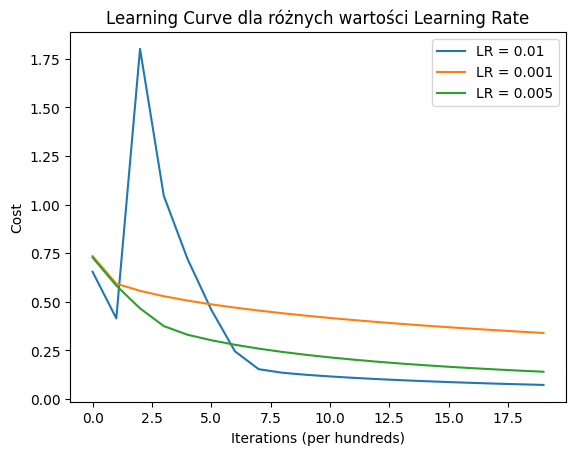

In [31]:
learning_rates = [0.01, 0.001, 0.005]

num_iterations = 2000
costs_dict = {}

for lr in learning_rates:
    # Utwórz nowy model dla każdej wartości learning rate
    model = nn.Sequential(
        nn.Linear(input_dim, 1),
        nn.Sigmoid()
    )
    criterion = nn.BCELoss()
    optimizer = optim.SGD(model.parameters(), lr=lr)
    costs = []
    
    for i in range(num_iterations):
        optimizer.zero_grad()
        outputs = model(X_train)
        loss = criterion(outputs, Y_train)
        loss.backward()
        optimizer.step()
        
        if i % 100 == 0:
            costs.append(loss.item())
            print(f"LR={lr}, iteration {i}: loss={loss.item()}")
    
    costs_dict[lr] = costs

    # Obliczenie Train i Test accuracy
    with torch.no_grad():
        train_pred = (model(X_train) > 0.5).float()
        test_pred = (model(X_test) > 0.5).float()
        train_accuracy = 100 - torch.mean(torch.abs(train_pred - Y_train)) * 100
        test_accuracy = 100 - torch.mean(torch.abs(test_pred - Y_test)) * 100
        print(f"\nTrain accuracy for LR {lr}: {train_accuracy.item()}%")
        print(f"Test accuracy for LR {lr}: {test_accuracy.item()}%\n")
        print("-------------------------------------------------------\n")

# Wizualizacja wyników
for lr, costs in costs_dict.items():
    plt.plot(np.array(costs), label=f"LR = {lr}")

plt.xlabel("Iterations (per hundreds)")
plt.ylabel("Cost")
plt.title("Learning Curve dla różnych wartości Learning Rate")
plt.legend()
plt.show()

LR=0.006, iteration 0: loss=0.6987144947052002
LR=0.006, iteration 100: loss=0.6513726711273193
LR=0.006, iteration 200: loss=0.5393491387367249
LR=0.006, iteration 300: loss=0.4402356445789337
LR=0.006, iteration 400: loss=0.3511500060558319
LR=0.006, iteration 500: loss=0.27968430519104004
LR=0.006, iteration 600: loss=0.2504298985004425
LR=0.006, iteration 700: loss=0.23177506029605865
LR=0.006, iteration 800: loss=0.21576359868049622
LR=0.006, iteration 900: loss=0.2018173485994339
LR=0.006, iteration 1000: loss=0.1895388960838318
LR=0.006, iteration 1100: loss=0.17863523960113525
LR=0.006, iteration 1200: loss=0.16888245940208435
LR=0.006, iteration 1300: loss=0.16010497510433197
LR=0.006, iteration 1400: loss=0.15216243267059326
LR=0.006, iteration 1500: loss=0.14494118094444275
LR=0.006, iteration 1600: loss=0.13834749162197113
LR=0.006, iteration 1700: loss=0.13230367004871368
LR=0.006, iteration 1800: loss=0.12674440443515778
LR=0.006, iteration 1900: loss=0.12161437422037125


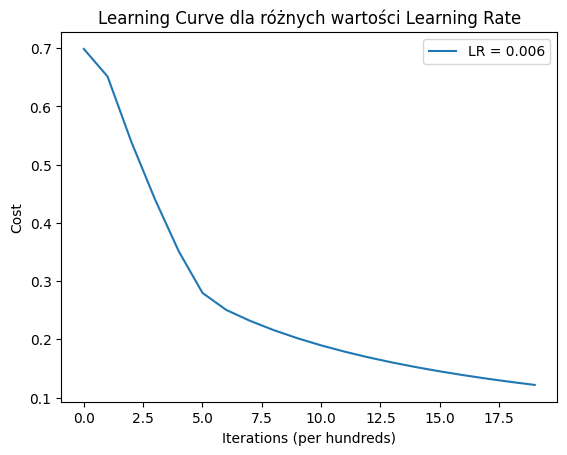

In [33]:
#learning_rates = [0.01, 0.001, 0.005]
learning_rates = [0.006]
num_iterations = 2000
costs_dict = {}
models_dict = {}  # słownik do przechowywania modeli

for lr in learning_rates:
    # Utwórz nowy model dla każdej wartości learning rate
    model = nn.Sequential(
        nn.Linear(input_dim, 1),
        nn.Sigmoid()
    )
    criterion = nn.BCELoss()
    optimizer = optim.SGD(model.parameters(), lr=lr)
    costs = []
    
    for i in range(num_iterations):
        optimizer.zero_grad()
        outputs = model(X_train)
        loss = criterion(outputs, Y_train)
        loss.backward()
        optimizer.step()
        
        if i % 100 == 0:
            costs.append(loss.item())
            print(f"LR={lr}, iteration {i}: loss={loss.item()}")
    
    costs_dict[lr] = costs
    
    # Obliczenie Train i Test accuracy
    with torch.no_grad():
        train_pred = (model(X_train) > 0.5).float()
        test_pred = (model(X_test) > 0.5).float()
        train_accuracy = 100 - torch.mean(torch.abs(train_pred - Y_train)) * 100
        test_accuracy = 100 - torch.mean(torch.abs(test_pred - Y_test)) * 100
        print(f"\nTrain accuracy for LR {lr}: {train_accuracy.item()}%")
        print(f"Test accuracy for LR {lr}: {test_accuracy.item()}%\n")
        print("-------------------------------------------------------\n")
    
    # Zapisz wytrenowany model do słownika
    models_dict[lr] = model
    # Zapisz stan modelu do pliku
    torch.save(model.state_dict(), f'model_lr_{lr}.pt')
    print(f"Model for LR {lr} saved to model_lr_{lr}.pt")

# Wizualizacja wyników
for lr, costs in costs_dict.items():
    plt.plot(np.array(costs), label=f"LR = {lr}")

plt.xlabel("Iterations (per hundreds)")
plt.ylabel("Cost")
plt.title("Learning Curve dla różnych wartości Learning Rate")
plt.legend()
plt.show()


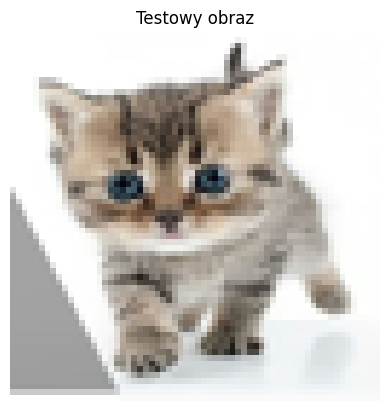

Predicted label: 1
Class: cat


In [35]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from lr_utils import load_dataset  # Funkcja ładująca dane

# Wczytanie danych, aby pobrać informacje o klasach oraz rozmiarze obrazu
train_set_x_orig, train_set_y, test_set_x_orig, test_set_y, classes = load_dataset()
num_px = train_set_x_orig.shape[1]
input_dim = num_px * num_px * 3  # zakładając, że obraz jest kolorowy

# Definicja architektury modelu (takiej samej jak przy treningu)
model = nn.Sequential(
    nn.Linear(input_dim, 1),
    nn.Sigmoid()
)

# Wczytanie zapisanego stanu modelu (upewnij się, że plik 'model_lr_0.005.pt' jest w katalogu roboczym)
model.load_state_dict(torch.load('model_lr_0.005.pt', map_location=torch.device('cpu')))
model.eval()  # Ustaw model w tryb ewaluacji

# Wczytanie obrazu do testowania (zmień ścieżkę do pliku na właściwą)
my_image = "images/kot2.jpg"  # <-- zamień na ścieżkę do Twojego obrazu
image = Image.open(my_image).resize((num_px, num_px))
plt.imshow(image)
plt.title("Testowy obraz")
plt.axis("off")
plt.show()

# Przetwarzanie obrazu: konwersja do tablicy NumPy, normalizacja i spłaszczenie do wektora
image_np = np.array(image).astype(np.float32)
image_np = image_np / 255.
image_np = image_np.reshape(1, -1)  # kształt: [1, input_dim]

# Konwersja do tensora PyTorch
image_tensor = torch.tensor(image_np)

# Dokonanie predykcji
with torch.no_grad():
    prediction = model(image_tensor)
    predicted_label = int((prediction > 0.5).float().item())

# Wyświetlenie wyniku
print("Predicted label:", predicted_label)
print("Class:", classes[predicted_label].decode("utf-8"))